<a href="https://colab.research.google.com/github/austinkirwin/public-projects/blob/main/Python_projects/InsuranceModel/Insurance_model_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurance Cost Analysis Project

## Background Information

Insurance companies are always interested in how they can maximize their profit based on the risk level of their customers. In this analysis I will be creating a predictive neural network based on the data provided from this [Kaggle Page]("https://www.kaggle.com/datasets/mirichoi0218/insurance") in order to accurately predict how much a customer should be charged based on the given explanatory variables. Furthermore, I will be creating a linear/logistic regression model to determine which variable is most significantly affecting the charges of the customer.

### Imports

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

### Reading the dataset into pandas

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Note:** The data contains string values which the model will not be able to process; therefore, the data values will be one-hot encoded.

In [ ]:
# One-hot encoding the data
insurance_one_hot_encoded = pd.get_dummies(insurance, dtype = int)

### Creating the training and test datasets

In [ ]:
# Separating explanatory variables (expvar) and response (charges)
expvar = insurance_one_hot_encoded.drop("charges", axis = 1)
charges = insurance_one_hot_encoded["charges"]
expvar_train, expvar_test, charges_train, charges_test = train_test_split(expvar, charges, test_size = .2, random_state = 10) # random_state is set for reproducibility
len(expvar_test) / len(expvar) # Make sure the split worked

0.20029895366218237

### Creating a basic neural network model

This first model will have 1 layer, use SGD as its optimizer, and run for 100 epochs.

In [ ]:
# Set random seed (for reproducibility)
tf.random.set_seed(10)

# 1. Create the model
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_1.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.SGD(),
                          metrics = ["mae"])

# 3. Fit the model
history = insurance_model_1.fit(expvar_train, charges_train, epochs = 100, verbose = 0) # verbose = 0 to reduce clutter, since I will be evaluating the model anyway

In [ ]:
# Evaluating the model
insurance_model_1.evaluate(expvar_test, charges_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6816.2783 - mae: 6816.2783 


[7177.03076171875, 7177.03076171875]

Text(0.5, 0, 'epochs')

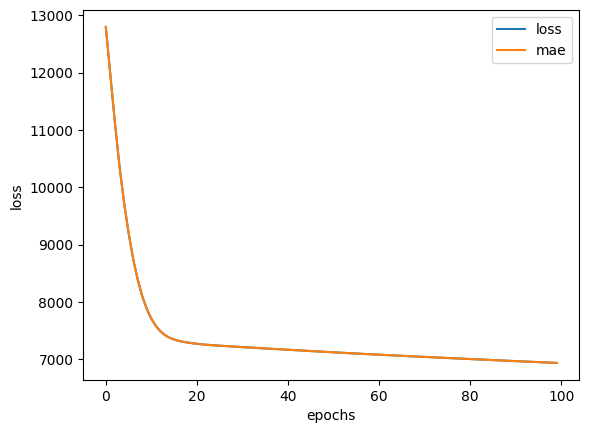

In [ ]:
# Plotting the loss
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Making a function

Now to, hopefully, expedite the process of creating multiple models and evaluating them, I will create a function to:

1. Create the models
2. Report the MAE of the evaluation using the test data
3. Plot the loss over time.

In [ ]:
# Model Creating Function

def create_neural_network(seed = 10, # sets random seed to 10 by default
                   num_layers = 0, # adds 0 additional hidden layers
                   num_units = 0, # sets number of units in additional hidden layers to 0
                   optimizer = "SGD", # sets optimizer to SGD by default
                   learning_rate = .001, # sets learning_rate if using Adam optimizer
                   epochs = 100): # epochs is set to 100 by default
  """
  A function that creates a neural network with num_layers additional hidden layers, each of which has num_units hidden units. The optimizer is either SGD or Adam for the purposes of this project. Epochs is 100 by default but can adjusted.
  """
  tf.random.set_seed(seed)

  # 1. Create dummy model
  dummy_model = tf.keras.Sequential([])

  # 2. Add hidden layers
  for i in range(num_layers):
    dummy_model.add(tf.keras.layers.Dense(num_units))
  dummy_model.add(tf.keras.layers.Dense(1))

  # 3. Compile the model
  if optimizer == "SGD":
    dummy_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])
  else:
    dummy_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
                        metrics = ["mae"])

  # 4. Fit the model
  history = dummy_model.fit(expvar_train, charges_train, epochs = epochs, verbose = 0) # This function is specific to this project so it will be using the training and test data I have already created

  # 5. Evaluate the model
  test_mae = dummy_model.evaluate(expvar_test, charges_test)

  # 6. Plot the loss over time
  pd.DataFrame(history.history).plot()
  plt.xlabel("epochs")
  plt.ylabel("loss")

  # 7. Return evaluation metric
  print(test_mae)

### Improving the model

The first model is never the best, so now I will attempt to create 3 more models that will (hopefully) have improved performance.

* `Model 2` : 1 add. hidden layer with 100 units, 100 epochs
* `Model 3` : Same as `Model 2` but with 200 epochs
* `Model 4` : 2 add. hidden layers with 100 units, 100 epochs

**Optimizer:** If necessary the optimizer will be changed to Adam if SGD is unable to return an MAE value.

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6521.8691 - mae: 6521.8691  
[6885.44677734375, 6885.44677734375]


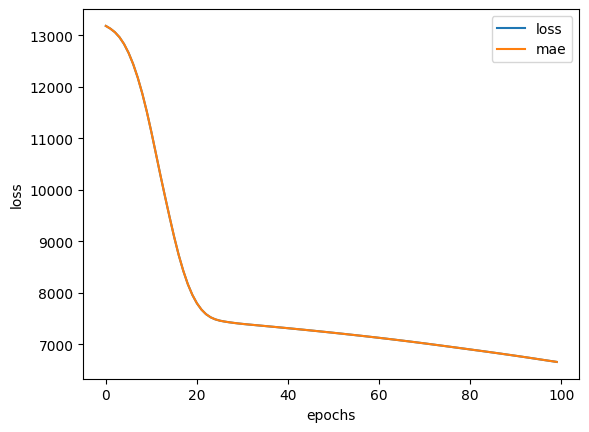

In [ ]:
# Creating Model 2
insurance_model_2 = create_neural_network(num_layers = 1, num_units = 100, optimizer = "Adam") # The model seemed to struggle to learn using the SGD optimizer so Adam was used

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5965.7827 - mae: 5965.7827  
[6336.0615234375, 6336.0615234375]


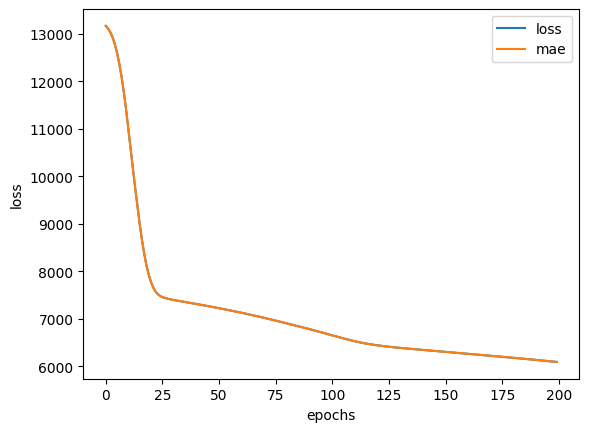

In [ ]:
# Creating Model 3
insurance_model_3 = create_neural_network(num_layers = 1, num_units = 100, optimizer = "Adam", epochs = 200) # The model seemed to struggle to learn using the SGD optimizer so Adam was used

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3702.6672 - mae: 3702.6672  
[3872.36767578125, 3872.36767578125]


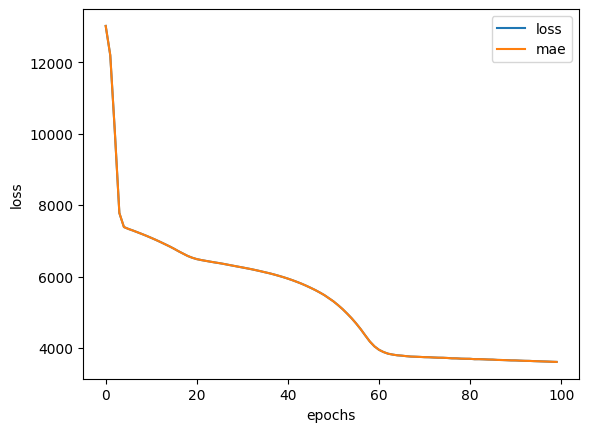

In [ ]:
# Creating Model 4
insurance_model_4 = create_neural_network(num_layers = 2, num_units = 100, optimizer = "Adam", epochs = 100) # The model seemed to struggle to learn using the SGD optimizer so Adam was used

### Best performing model so far

`Model 4` performed the best with an MAE of ~3700. The model's learning appeared to drop-off drastically at 60 epochs, but there is definite decrease until 100 epochs. Therefore, it could be said that 200 epochs would result in an even better MAE, which I will be testing.

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3862.8740 - mae: 3862.8740  
[3881.950439453125, 3881.950439453125]


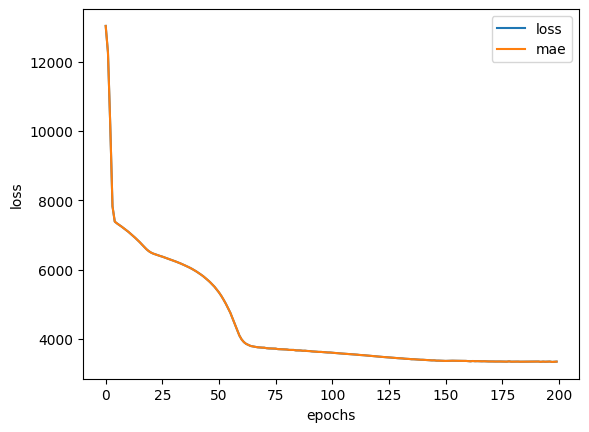

In [ ]:
# Enhancing Model 4
insurance_model_4_enhanced = create_neural_network(num_layers = 2, num_units = 100, optimizer = "Adam", epochs = 200) # Same as Model 4, but epochs = 200 instead of 100 to give model more opportunity to improve

**Too many epochs!** The tail-end of the graph shows a slight increase in MAE, possibly a result of the model overfitting for the training data. Around 125 epochs seems to still be decreasing... time to test it.

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3798.8689 - mae: 3798.8689  
[3894.418212890625, 3894.418212890625]


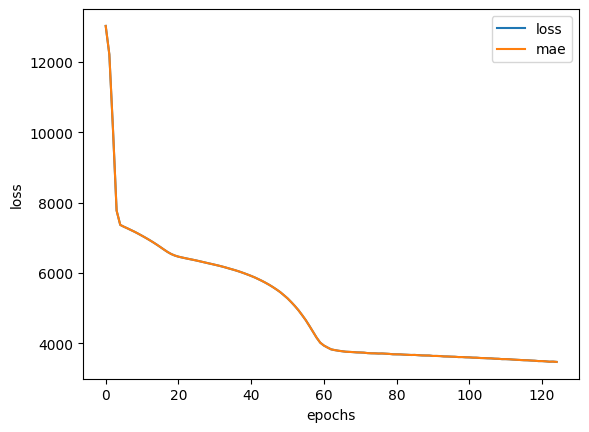

In [ ]:
insurance_model_4_enhanced_2 = create_neural_network(num_layers = 2, num_units = 100, optimizer = "Adam", epochs = 125) # Reducing number of epochs to 125 to try and reduce overfitting

### Neural Network Conclusions

Despite trying to optimize the number of epochs manually, insurance_model_4 seems to perform the best compared to either of its 'enhanced' counterparts.  The final, best model (Model 4) has an MAE of ~3700 with 2 additional hidden layers each with 100 hidden units. It uses the Adam optimizer with the default learning rate and runs for 100 epochs.

Additional Notes:
1. Early Stopping Callback (or other methods) can be used to better optimize the number of epochs the model runs compared to guessing based on the loss graph. *Although this will not be explored in this project*.
2. The training and test data is not Normalized or Standardized which could further improve the MAE value and should be tested.
3. Only 6 neural networks were created. There is a decent likelihood that changing the number of additional hidden layers and the number of hidden units could reduce the MAE further.
4. The function used to create the neural networks, while handy, does not allow for additional hidden layers to have a different number of hidden units. This means the optimization of the neural network is slightly one-dimensional when it comes to changing the number of hidden layers and units.

### For the Linear Regression Model:

1. Use a Backwards Elimination Algorithm to determine which model has the greatest R^2 value.
2. Make sure the model satisfies the linearity assumption.

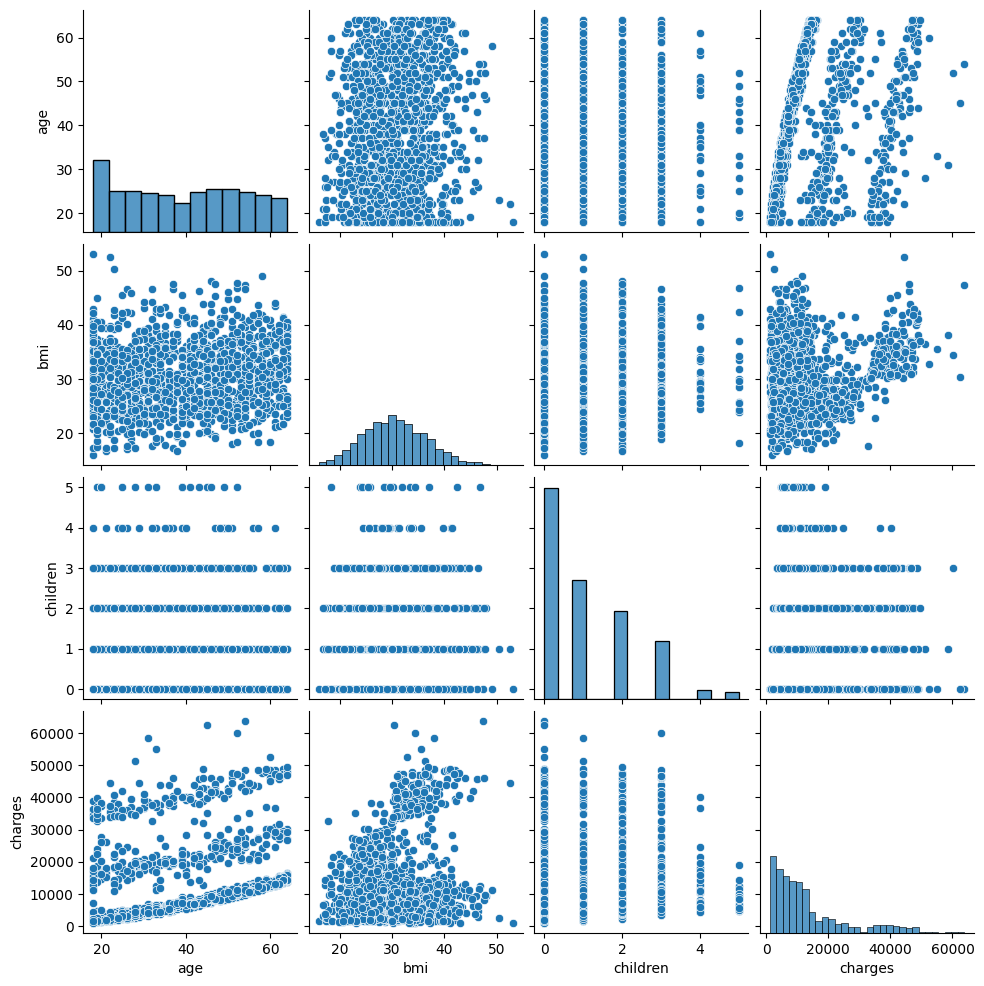

In [ ]:
sns.pairplot(insurance) # Pairplot of all the variables

**Note:** Visually, there do not seem to be any explanatory variables that have a significant effect on how much the charges are (although having more than 3 children seems to lead to lower charges).

In [ ]:
insurance_one_hot_encoded # to check the var names

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
insurance_full_model_linreg = smf.ols(formula='charges~age+bmi+children+sex_female+sex_male+smoker_no+smoker_yes+region_northeast+region_northwest+region_southeast+region_southwest', data=insurance_one_hot_encoded).fit()
insurance_full_model_linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 28 Jan 2025   Prob (F-statistic):               0.00
Time:                        01:19:56   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -296.4168    430.507     -0.689      0.491   -1140.964     548.130
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
sex_female         -82.5512    269.226     -0.307      0.759    -610.706     445.604
sex_male          -213.8656    274.976     -0.778      0.437    -753.299     325.568
smoker_no        -1.207e+04    282.338    -42.759      0.000   -1.26e+04   -1.15e+04
smoker_yes        1.178e+04    313.530     37.560      0.000    1.12e+04    1.24e+04
region_northeast   512.9050    300.348      1.708      0.088     -76.303    1102.113
region_northwest   159.9411    301.334      0.531      0.596    -431.201     751.083
region_southeast  -522.1170    330.759     -1.579      0.115   -1170.983     126.749
region_southwest  -447.1459    310.933     -1.438      0.151   -1057.119     162.827
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                     6.51e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.3e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

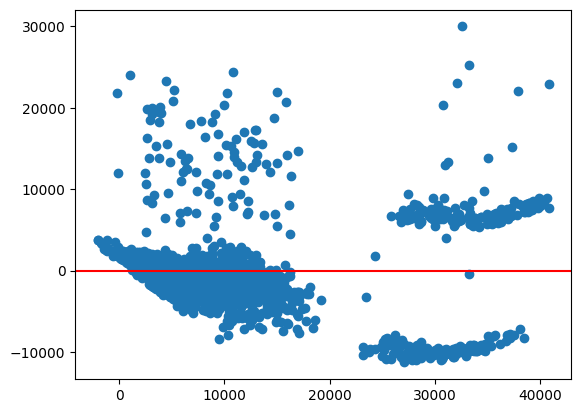

In [ ]:
# scatter plot of the residuals
plt.scatter(insurance_full_model_linreg.fittedvalues, insurance_full_model_linreg.resid)
plt.axhline(y=0, color='r')
plt.show()

The model's residuals seem to have an even spread above and below the x-axis, therefore it meets the linearity assumption.

### Creating predictive models using Backwards Elimination

In [ ]:
insurance_train, insurance_test = train_test_split(insurance_one_hot_encoded, test_size=.2, random_state=10) # splitting the data to test the models
len(insurance_test) / len(insurance_one_hot_encoded) # check split

0.20029895366218237

In [ ]:
insurance_train

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
559,19,35.530,0,1646.42970,0,1,1,0,0,1,0,0
273,50,27.455,1,9617.66245,0,1,1,0,1,0,0,0
471,18,30.115,0,2203.47185,1,0,1,0,1,0,0,0
22,18,34.100,0,1137.01100,0,1,1,0,0,0,1,0
939,53,29.480,0,9487.64420,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1180,42,41.325,1,7650.77375,1,0,1,0,1,0,0,0
1147,20,31.920,0,2261.56880,1,0,1,0,0,1,0,0
527,51,25.800,1,9861.02500,1,0,1,0,0,0,0,1
1149,42,34.100,0,5979.73100,0,1,1,0,0,0,0,1


In [ ]:
# scaling the training data and making a data frame
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(insurance_train)
df_train_scaled = pd.DataFrame(scaled_train_data, columns = insurance_train.columns)
df_train_scaled

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.423960,0.784788,-0.899332,-0.949383,-0.987000,0.987000,0.504377,-0.504377,-0.575192,1.774059,-0.605425,-0.565118
1,0.767917,-0.529475,-0.071916,-0.294360,-0.987000,0.987000,0.504377,-0.504377,1.738550,-0.563679,-0.605425,-0.565118
2,-1.494665,-0.096542,-0.899332,-0.903609,1.013171,-1.013171,0.504377,-0.504377,1.738550,-0.563679,-0.605425,-0.565118
3,-1.494665,0.552045,-0.899332,-0.991244,-0.987000,0.987000,0.504377,-0.504377,-0.575192,-0.563679,1.651733,-0.565118
4,0.980034,-0.199892,-0.899332,-0.305044,-0.987000,0.987000,0.504377,-0.504377,-0.575192,-0.563679,1.651733,-0.565118
...,...,...,...,...,...,...,...,...,...,...,...,...
1065,0.202271,1.727966,-0.071916,-0.455986,1.013171,-1.013171,0.504377,-0.504377,1.738550,-0.563679,-0.605425,-0.565118
1066,-1.353254,0.197235,-0.899332,-0.898835,1.013171,-1.013171,0.504377,-0.504377,-0.575192,1.774059,-0.605425,-0.565118
1067,0.838622,-0.798838,-0.071916,-0.274362,1.013171,-1.013171,0.504377,-0.504377,-0.575192,-0.563679,-0.605425,1.769541
1068,0.202271,0.552045,-0.899332,-0.593301,-0.987000,0.987000,0.504377,-0.504377,-0.575192,-0.563679,-0.605425,1.769541


In [ ]:
# scaling the test data and making a data frame
scaler2 = StandardScaler()
scaled_test_data = scaler2.fit_transform(insurance_test)
df_test_scaled = pd.DataFrame(scaled_test_data, columns = insurance_test.columns)
df_test_scaled

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-0.181626,-0.465506,1.573706,-0.529499,1.0,-1.0,0.519752,-0.519752,-0.525538,1.732051,-0.634934,-0.571605
1,-0.254932,-0.610518,-0.946732,-0.699534,1.0,-1.0,0.519752,-0.519752,-0.525538,1.732051,-0.634934,-0.571605
2,1.431123,1.121988,-0.106586,-0.101755,-1.0,1.0,0.519752,-0.519752,-0.525538,-0.577350,-0.634934,1.749459
3,1.577736,-0.916653,-0.946732,0.925534,1.0,-1.0,0.519752,-0.519752,-0.525538,-0.577350,1.574967,-0.571605
4,-0.768080,-0.755529,-0.946732,-0.828842,1.0,-1.0,0.519752,-0.519752,-0.525538,1.732051,-0.634934,-0.571605
...,...,...,...,...,...,...,...,...,...,...,...,...
263,0.771362,0.630136,0.733560,2.474477,-1.0,1.0,-1.923994,1.923994,-0.525538,-0.577350,-0.634934,1.749459
264,-0.988000,1.645216,-0.946732,-0.874035,1.0,-1.0,0.519752,-0.519752,-0.525538,1.732051,-0.634934,-0.571605
265,-1.501147,-0.546068,0.733560,0.755013,-1.0,1.0,0.519752,-0.519752,-0.525538,1.732051,-0.634934,-0.571605
266,1.284509,1.774115,-0.946732,-0.167691,-1.0,1.0,0.519752,-0.519752,1.902811,-0.577350,-0.634934,-0.571605


### Non-Regularized Linear Regression Full Model

In [ ]:
train_expvar = df_train_scaled.drop('charges', axis=1) # only the explanatory variables of the training data
train_target = df_train_scaled['charges'] # the target variable

test_expvar = df_test_scaled.drop('charges', axis=1) # only the explanatory variables of the test data
test_target = df_test_scaled['charges'] # target variable

linreg = LinearRegression() # instantiating the Linear Regression model
linreg.fit(train_expvar, train_target) # fitting the model with training data
linreg.score(test_expvar, test_target) # checking R^2 value with test data

0.6969180450282757

### Backwards Elimination Algorithm

1. Make multiple Linear Regression models while removing one explanatory variable
2. Check each models' R^2 value
3. Select the best model

In [ ]:
# check variable names
train_expvar

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.423960,0.784788,-0.899332,-0.987000,0.987000,0.504377,-0.504377,-0.575192,1.774059,-0.605425,-0.565118
1,0.767917,-0.529475,-0.071916,-0.987000,0.987000,0.504377,-0.504377,1.738550,-0.563679,-0.605425,-0.565118
2,-1.494665,-0.096542,-0.899332,1.013171,-1.013171,0.504377,-0.504377,1.738550,-0.563679,-0.605425,-0.565118
3,-1.494665,0.552045,-0.899332,-0.987000,0.987000,0.504377,-0.504377,-0.575192,-0.563679,1.651733,-0.565118
4,0.980034,-0.199892,-0.899332,-0.987000,0.987000,0.504377,-0.504377,-0.575192,-0.563679,1.651733,-0.565118
...,...,...,...,...,...,...,...,...,...,...,...
1065,0.202271,1.727966,-0.071916,1.013171,-1.013171,0.504377,-0.504377,1.738550,-0.563679,-0.605425,-0.565118
1066,-1.353254,0.197235,-0.899332,1.013171,-1.013171,0.504377,-0.504377,-0.575192,1.774059,-0.605425,-0.565118
1067,0.838622,-0.798838,-0.071916,1.013171,-1.013171,0.504377,-0.504377,-0.575192,-0.563679,-0.605425,1.769541
1068,0.202271,0.552045,-0.899332,-0.987000,0.987000,0.504377,-0.504377,-0.575192,-0.563679,-0.605425,1.769541


In [ ]:
linreg_no_age = LinearRegression()
linreg_no_age.fit(train_expvar.drop('age', axis=1), train_target)
linreg_no_age.score(test_expvar.drop('age', axis=1), test_target)

0.6124768549183565

In [ ]:
linreg_no_bmi = LinearRegression()
linreg_no_bmi.fit(train_expvar.drop('bmi', axis = 1), train_target)
linreg_no_bmi.score(test_expvar.drop('bmi', axis = 1), test_target)

0.680623467524061

In [ ]:
linreg_no_children = LinearRegression()
linreg_no_children.fit(train_expvar.drop('children', axis =1), train_target)
linreg_no_children.score(test_expvar.drop('children', axis=1), test_target)

0.6972812472805388

In [ ]:
linreg_no_sex_female = LinearRegression()
linreg_no_sex_female.fit(train_expvar.drop('sex_female', axis=1), train_target)
linreg_no_sex_female.score(test_expvar.drop('sex_female', axis =1), test_target)

0.6969180450282757

In [ ]:
linreg = LinearRegression()
linreg.fit(train_expvar, train_target)
linreg.score(test_expvar, test_target) # show the full model's R^2 value

0.6969180450282757

### Best Model

The best performing model, according to the R^2 value, was the Linear Regression Model that did not include children in it.

In [ ]:
best_model = smf.ols('charges~age+bmi+sex_female+sex_male+smoker_no+smoker_yes+region_northeast+region_northwest+region_southeast+region_southwest', data=insurance_one_hot_encoded).fit()
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     566.0
Date:                Tue, 28 Jan 2025   Prob (F-statistic):               0.00
Time:                        03:01:57   Log-Likelihood:                -13554.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1330   BIC:                         2.717e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -109.4338    428.830     -0.255      0.799    -950.691     731.824
age                258.5397     11.937     21.658      0.000     235.121     281.958
bmi                340.4592     28.714     11.857      0.000     284.129     396.789
sex_female           1.0681    269.231      0.004      0.997    -527.095     529.231
sex_male          -110.5019    274.457     -0.403      0.687    -648.918     427.915
smoker_no        -1.199e+04    282.378    -42.447      0.000   -1.25e+04   -1.14e+04
smoker_yes        1.188e+04    313.447     37.891      0.000    1.13e+04    1.25e+04
region_northeast   537.5783    301.491      1.783      0.075     -53.872    1129.029
region_northwest   233.4748    301.809      0.774      0.439    -358.600     825.549
region_southeast  -501.6238    332.059     -1.511      0.131   -1153.040     149.792
region_southwest  -378.8631    311.572     -1.216      0.224    -990.090     232.364
==============================================================================
Omnibus:                      297.969   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              703.692
Skew:                           1.208   Prob(JB):                    1.57e-153
Kurtosis:                       5.606   Cond. No.                     5.17e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Linear Regression Conclusions

Since this model has an R^2 value of ~.6973, I would recommend using it to make predictions. However, I did not explore multiple other model variations to see if they would have a greater R^2 value. To those interested in modeling this data, I would recommend exploring LASSO regression, Ridge Regression, Elastic Net models, and Forward Selection.